
## Amolika Bansal
## 2020424
## ML - ASSIGNMENT 4

##A1 [P ∥ CO2 & CO3] Clustering (8 points)
Load the ‘Human Activity Recognition Using Smartphones Dataset’ 1 and visualize it through UMAP plot.
Implement the K-Means and spectral clustering algorithms. Using the elbow curve, find the optimal value
of ‘K’ for each algorithm. Evaluate your results using an appropriate evaluation metric and present the test
scores for each algorithm.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# Load wine dataset
from sklearn.datasets import load_wine
wine = load_wine()


# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Bagging Classifier
from sklearn.ensemble import BaggingClassifier

# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# Clustering using UMAP and KMeans
!pip install umap-learn
import umap.umap_ as umap


# Clustering using Spectral Clustering
from sklearn.cluster import SpectralClustering

# Linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=a2d7277106c271c38c0c38f7a4c2a4501cb6f9ea4fee975738cb781218b78e02
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=d59d7ed193b3dce6ef759856dc81360437556ea049bf8318e72cca15ed0ca805
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [ ]:

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_path = "/content/gdrive/MyDrive/Datasets/hum_ac_rec.csv/train/"
test_path = "/content/gdrive/MyDrive/Datasets/hum_ac_rec.csv/test/"
#Load training data
x_train = []
with open(train_path+'X_train.txt') as f:
for line in f:
x_train.append([float(x) for x in line.split()])
x_train = np.array(x_train)
print(len(x_train))
print(x_train)

7352
[[ 0.28858451 -0.02029417 -0.13290514 ... -0.84124676  0.17994061
  -0.05862692]
 [ 0.27841883 -0.01641057 -0.12352019 ... -0.8447876   0.18028889
  -0.05431672]
 [ 0.27965306 -0.01946716 -0.11346169 ... -0.84893347  0.18063731
  -0.04911782]
 ...
 [ 0.27338737 -0.01701062 -0.04502183 ... -0.77913261  0.24914484
   0.04081119]
 [ 0.28965416 -0.01884304 -0.15828059 ... -0.78518142  0.24643223
   0.02533948]
 [ 0.35150347 -0.01242312 -0.20386717 ... -0.78326693  0.24680852
   0.03669484]]


In [ ]:
#Load training labels
y_train = []
with open(train_path+'y_train.txt') as f:
for line in f:
y_train.append([float(x) for x in line.split()])
y_train = np.array(y_train)
print(len(y_train))
print(y_train)

7352
[[5.]
 [5.]
 [5.]
 ...
 [2.]
 [2.]
 [2.]]


In [ ]:
#Load testing data
x_test = []
with open(test_path+'X_test.txt') as f:
for line in f:
x_test.append([float(x) for x in line.split()])
x_test = np.array(x_test)
print(len(x_test))
print(x_test)

2947
[[ 0.25717778 -0.02328523 -0.01465376 ... -0.72000927  0.27680104
  -0.0579783 ]
 [ 0.28602671 -0.01316336 -0.11908252 ... -0.69809082  0.28134292
  -0.08389801]
 [ 0.27548482 -0.02605042 -0.11815167 ... -0.70277146  0.28008303
  -0.0793462 ]
 ...
 [ 0.34996609  0.03007744 -0.11578796 ... -0.65535684  0.27447878
   0.18118355]
 [ 0.23759383  0.01846687 -0.09649893 ... -0.65971859  0.26478161
   0.18756291]
 [ 0.15362719 -0.01843651 -0.13701846 ... -0.66008023  0.26393619
   0.1881034 ]]


In [ ]:
#Load testing labels
y_test = []
with open(test_path+'y_test.txt') as f:
for line in f:
y_test.append([float(x) for x in line.split()])
y_test = np.array(y_test)
print(len(y_test))
print(y_test)

2947
[[5.]
 [5.]
 [5.]
 ...
 [2.]
 [2.]
 [2.]]


In [ ]:
print(x_test.shape)

(2947, 561)


In [ ]:

mapper = umap.UMAP().fit_transform(x_train)
print(mapper)

[[17.121386   5.2388425]
 [15.527304   2.8773203]
 [15.82413    3.3814793]
 ...
 [ 3.5118349 -1.2465976]
 [ 3.4660335 -1.2277662]
 [ 3.4574606 -1.2353011]]


In [ ]:
print(np.unique(y_train))

[1. 2. 3. 4. 5. 6.]


<Axes: >

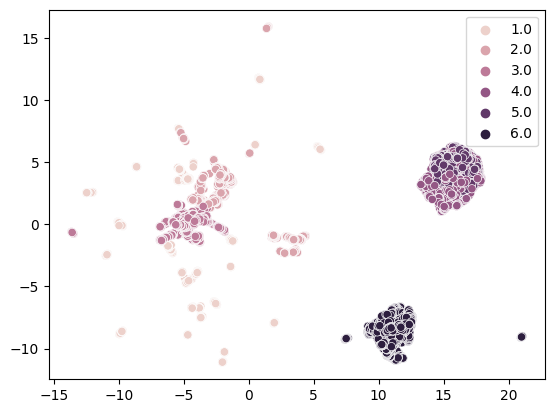

In [ ]:
sns.scatterplot(x=mapper[:, 0], y=mapper[:, 1], hue = y_train.reshape(1,-1)[0])

In [ ]:

# This code performs K-means clustering on the training data x_train with a varying number of clusters from 1 to 19. It creates a KMeans object with the specified number of clusters using the KMeans function from the sklearn.cluster module, fits the model to the training data using the fit method, and appends the resulting distortion (sum of squared distances of samples to their closest cluster center) to a list list_of_distortion.
from sklearn.cluster import KMeans

# Create an empty list to store the distortion values for each number of clusters
list_of_distortion = []

# Loop through different numbers of clusters
for cluster in range(1, 20):
  # Create a KMeans object with the current number of clusters and 10 initializations
  model = KMeans(n_clusters=cluster, n_init=10)
  
  # Fit the KMeans model to the training data
  model.fit(x_train)
  
  # Calculate the distortion of the fitted model and append it to the list
  list_of_distortion.append(model.inertia_)


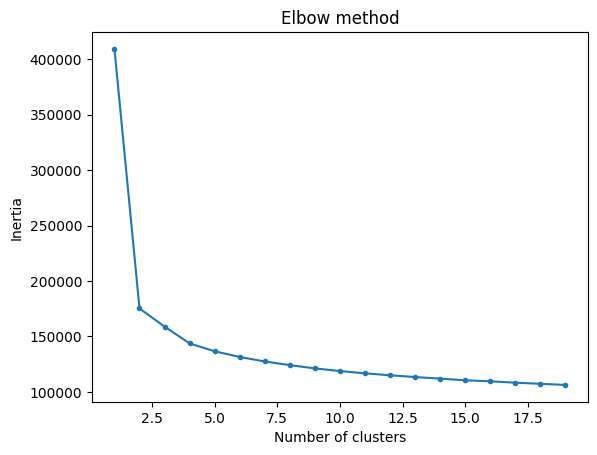

In [ ]:
# Create a line plot with the range of cluster numbers on the x-axis and the corresponding distortion values on the y-axis
plt.plot(range(1, 20), list_of_distortion, marker='.')
# Add a label to the x-axis
plt.xlabel('Number of clusters')
# Add a label to the y-axis
plt.ylabel('Inertia')
# Add a title to the plot
plt.title('Elbow method')
# Display the plot
plt.show()


In [ ]:
print(x_train.shape)

(7352, 561)


In [ ]:
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(x_train, y_train, test_size=0.9, stratify=y_train)

In [ ]:
# Initialize an empty list to store the scores for each number of clusters
list_of_score = []

# Iterate over a range of cluster numbers from 1 to 19
for i in range(1, 20):
    
    # Initialize a SpectralClustering model with the current number of clusters
    model = SpectralClustering(n_clusters=i)
    
    # Fit the model on the reduced training data and obtain cluster assignments for each observation
    pred = model.fit_predict(x_train_red)
    
    # Initialize a variable to store the average distance between points in each cluster
    dist = 0
    
    # Iterate over each cluster
    for j in range(i):
        
        # Initialize a variable to store the sum of distances between all pairs of points in the current cluster
        temp = 0
        
        # Obtain the points belonging to the current cluster
        pts_in_cl_j = x_train_red[pred == j]
        
        # Iterate over all pairs of points in the current cluster
        for pt1 in pts_in_cl_j:
            for pt2 in pts_in_cl_j:
                
                # Compute the Euclidean distance between the two points and add it to temp
                temp += np.sqrt(np.sum(np.square(pt1 - pt2)))
                
        # Compute the average distance between points in the current cluster
        if len(pts_in_cl_j) != 0:
            temp = temp / 2
            temp = temp / len(pts_in_cl_j)
            dist += temp
            
    # Compute the score for the current number of clusters and append it to the list_of_score
    list_of_score.append((dist / i))


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 993 with accuracies 
[1.87079690e-14 1.56028139e-05 9.38372362e-06]
not reaching the requested tolerance 1.0952353477478027e-05.
Use iteration 958 instead with accuracy 
7.437336709857012e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[9.59363022e-15 9.79334520e-06 1.25186649e-05]
not reaching the requested tolerance 1.0952353477478027e-05.
  _, diffusion_map = lobpcg(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[4.30548312e-15 2.81873669e-06 5.84367079e-06 3.68684467e-05]
not reaching the requested tolerance 1.0952353477478027e-05.
Use iteration 1664 instead with accuracy 
6.4849832178121625e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.9/dist

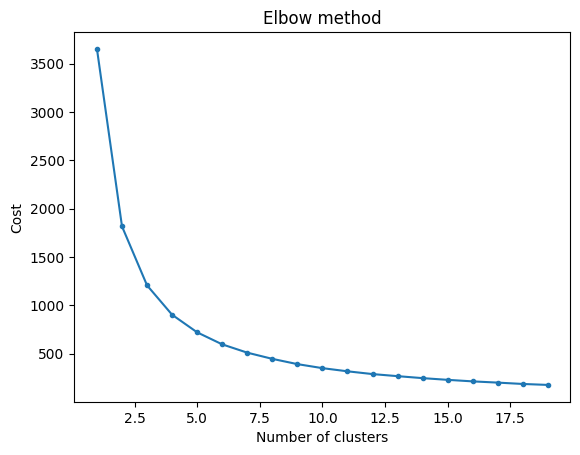

In [ ]:
plt.plot(range(1,20), list_of_score,marker='.')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow method')
plt.show()

In [ ]:

model = KMeans(n_clusters=2, n_init=10)
model.fit(x_train)
y_pred = model.predict(x_test)
score = silhouette_score(x_test,y_pred)
print("Silhoutte score for KMeans "+str(score))

Silhoutte score for KMeans 0.47433766358858365


In [ ]:
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train)
model = SpectralClustering(n_clusters=3)

y_pred = model.fit_predict(x_test_red)
score = silhouette_score(x_test_red,y_pred)
print("Silhoutte score for Spectral Clustering "+str(score))

Silhoutte score for Spectral Clustering 0.18994806844640316


## A2 [P ∥ CO3 & CO4] Random Forest (10 points)
Use the wine dataset2

to build one multi-class classifier each using the following techniques.

(a) Random forest
(b) Decision Tree with Bootstrap Aggregation
(c) Decision Tree with AdaBoost
Which of the above techniques worked best? Use an appropriate evaluation metric. Explain the inferences of
each technique.

In [ ]:
# Load the wine dataset from scikit-learn's datasets module
from sklearn.datasets import load_wine

# Get the features and target values of the wine dataset
x = load_wine()['data']
y = load_wine()['target']

# Print the features of the wine dataset
print(x)

# Print the target labels of the wine dataset
print(y)


[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# Print the shape of the input data x to inspect the number of observations and features
print("Shape of x " + str(x.shape))

# Print the feature names of the wine dataset to identify the features used in the analysis
print("Feature names")
print(load_wine()['feature_names'])

Shape of x (178, 13)
Feature names
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
df = pd.DataFrame(x,columns=load_wine()['feature_names'])
# creating a dataframe of the feature columns of the dataset
df['class']=y
# adding a column of class to each dataset
print(df)
# printing the dataframe

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [ ]:
# Print the first few rows of the DataFrame to inspect the data
print(df.head())

# Print the length of the DataFrame to get an idea of the number of observations in the data
print("Length of data " + str(len(df)))

# Print information about the DataFrame, such as column names and data types, to further inspect the data
print(df.info())



   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  
0           

In [ ]:
print(df.isnull().sum())
print("From the above we can observe that the data has no null values")


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64
From the above we can observe that the data has no null values


In [ ]:
print("The statistics of distribution")
print(df.describe())


The statistics of distribution
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453     

<Axes: xlabel='class', ylabel='count'>

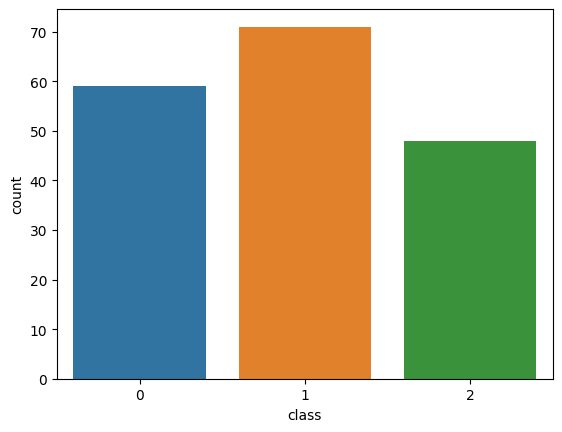

In [ ]:
sns.countplot(x=df['class'])


In [ ]:
x_of_df = df.drop(['class'],axis=1)
y_of_df= df['class']
x_train, x_test, y_train, y_test = train_test_split(x_of_df,y_of_df,test_size=0.3,random_state=10)


In [ ]:
print(x_train)
print(x_train.describe())


     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
174    13.40        3.91  2.48               23.0      102.0           1.80   
82     12.08        1.13  2.51               24.0       78.0           2.00   
2      13.16        2.36  2.67               18.6      101.0           2.80   
114    12.08        1.39  2.50               22.5       84.0           2.56   
153    13.23        3.30  2.28               18.5       98.0           1.80   
..       ...         ...   ...                ...        ...            ...   
113    11.41        0.74  2.50               21.0       88.0           2.48   
64     12.17        1.45  2.53               19.0      104.0           1.89   
15     13.63        1.81  2.70               17.2      112.0           2.85   
125    12.07        2.16  2.17               21.0       85.0           2.60   
9      13.86        1.35  2.27               16.0       98.0           2.98   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [ ]:
for col in x_train.columns:
  if col=='class':
    continue

  x_test[col]=(x_test[col] - x_train[col].min()) / (x_train[col].max()- x_train[col].min())
  x_train[col]=(x_train[col] - x_train[col].min()) / (x_train[col].max()- x_train[col].min())


In [ ]:
print(x_train)
print(x_train.describe())

      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
174  0.623684    0.626482  0.513158           0.623656   0.463768   
82   0.276316    0.077075  0.532895           0.677419   0.115942   
2    0.560526    0.320158  0.638158           0.387097   0.449275   
114  0.276316    0.128458  0.526316           0.596774   0.202899   
153  0.578947    0.505929  0.381579           0.381720   0.405797   
..        ...         ...       ...                ...        ...   
113  0.100000    0.000000  0.526316           0.516129   0.260870   
64   0.300000    0.140316  0.546053           0.408602   0.492754   
15   0.684211    0.211462  0.657895           0.311828   0.608696   
125  0.273684    0.280632  0.309211           0.516129   0.217391   
9    0.744737    0.120553  0.375000           0.247312   0.405797   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
174       0.282759    0.114206              0.566038         0.356846   
82        0.351724    0.3

In [ ]:
for col in x_of_df.columns:
  if col=='class':
    continue

  x_of_df[col]=(x_of_df[col] - x_of_df[col].min()) / (x_of_df[col].max()- x_train[col].min())


In [ ]:

classifier  = RandomForestClassifier(max_depth=4, random_state=10)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [ ]:
y_pred = classifier.predict(x_test)
print("Accuracy of random forest classifier "+str(accuracy_score(y_test, y_pred)))

Accuracy of random forest classifier 0.9444444444444444


In [ ]:

classifier  = BaggingClassifier(n_estimators=8, random_state=10)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print("Accuracy of decision tree classifier with bootstrap aggregation"+str(accuracy_score(y_test, y_pred)))

Accuracy of decision tree classifier with bootstrap aggregation0.9074074074074074


In [ ]:

classifier  = AdaBoostClassifier(n_estimators=25, random_state=10)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print("Accuracy of decision tree classifier with adaboost "+str(accuracy_score(y_test, y_pred)))

Accuracy of decision tree classifier with adaboost 0.9444444444444444


##A3 [P ∥ CO3 & CO4] Ensemble of Methods (12 points)
Use the ‘Vehicle dataset from Car Dekho‘ dataset 3

to prepare a pipeline that performs an ensemble of the
below models (built from scratch) to produce the final result. You are free to choose any ensemble approach.
• Lasso regression
• Ridge regression
• Locally weighted linear regression
• Regression decision trees
• KNN regressor

In [ ]:
import numpy as np

def lasso(alpha, noIterations, x_train, y_train, penalty):
    # Add a column of ones to the beginning of x_train
    tempOneArr = np.ones((len(x_train), 1))
    x_temp = np.hstack((tempOneArr, x_train))

    # Reshape y_train into a column vector
    y_train = y_train.reshape(-1, 1)

    # Initialize thetas as an array of zeros with the same length as the number of features in x_train plus 1
    thetas = np.zeros((len(x_train[0]) + 1, 1))

    for iteration in range(noIterations):
        # Initialize a temporary array of zeros with the same length as the number of features in x_train plus 1
        tempThetas = np.zeros((len(x_train[0]) + 1, 1))

        # Make predictions based on current thetas and calculate error
        y_pred = np.matmul(x_temp, thetas)
        err = y_train - y_pred

        # Update temporary thetas based on gradient descent, L1 penalty (Lasso), and learning rate
        tempThetas += (np.matmul(np.transpose(x_temp), err)) / (len(x_train))
        t = penalty * (np.sign(thetas))
        tempThetas += (t) / (len(x_train))

        # Update thetas based on learning rate and temporary thetas
        thetas += alpha * (tempThetas)

    return thetas


In [ ]:

import numpy as np

def ridge(alpha, noIterations, x_train, y_train, penalty):
    # Add a column of ones to the beginning of x_train
    tempOneArr = np.ones((len(x_train), 1))
    x_temp = np.hstack((tempOneArr, x_train))

    # Reshape y_train into a column vector
    y_train = y_train.reshape(-1, 1)

    # Initialize thetas as an array of zeros with the same length as the number of features in x_train plus 1
    thetas = np.zeros((len(x_train[0]) + 1, 1))

    for iteration in range(noIterations):
        # Initialize a temporary array of zeros with the same length as the number of features in x_train plus 1
        tempThetas = np.zeros((len(x_train[0]) + 1, 1))

        # Make predictions based on current thetas and calculate error
        y_pred = np.matmul(x_temp, thetas)
        err = y_train - y_pred

        # Update temporary thetas based on gradient descent and ridge penalty
        tempThetas += (np.matmul(np.transpose(x_temp), err)) / (len(x_train))
        tempThetas += (penalty * 2 * thetas) / (len(x_train))

        # Update thetas based on learning rate and temporary thetas
        thetas += alpha * (tempThetas)

    return thetas


In [ ]:

def predict(x_test, thetas):
    """
    Predicts the target variable for new input data using a linear regression model.

    Parameters:
    x_test (numpy.ndarray): The input data to make predictions on.
    thetas (numpy.ndarray): The learned parameters of the linear regression model.

    Returns:
    numpy.ndarray: The predicted target values for the input data.
    """
    # Add a column of ones to x_test to represent the bias term
    tempOneArr = np.ones((len(x_test), 1))
    x_temp = np.hstack((tempOneArr, x_test))

    # Compute the predicted target values using the dot product of x_temp and thetas
    y_pred = np.matmul(x_temp, thetas)

    return y_pred


In [ ]:
def lin_wt_reg(x_test, x_train, y_train, tao):
  """
  Applies linear weighted regression on the given test and training data.
  """

  # Add a column of ones to the test data for the bias term.
  tempOneArr = np.ones((len(x_test), 1))
  x_test = np.hstack((tempOneArr, x_test))  

  # Add a column of ones to the training data for the bias term.
  tempOneArr = np.ones((len(x_train), 1))
  x_temp = np.hstack((tempOneArr, x_train))

  y_pred = []
  # Iterate over each sample in the test data.
  for i in x_test:
    # Create an empty matrix for the weights.
    ww = []
    for k in range(len(x_temp)):
      ww.append([0 for j in range(len(x_temp))])

    # Calculate the weight for each training sample using the Gaussian kernel.
    for j in range(len(x_temp)):
      temp = (np.dot(np.transpose(x_temp[j] - i), x_temp[j] - i)) / (-2 * tao * tao)
      temp = math.exp(temp)
      ww[j][j] = temp

    for k in range(len(x_temp)):
      ww[k] = np.array(ww[k])
    ww = np.array(ww)

    # Calculate the theta using the weighted least squares.
    temp = np.matmul(np.transpose(x_temp), ww)
    theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(temp, x_temp)), temp), y_train)

    # Calculate the predicted target value for the current test sample.
    y_pred.append(np.matmul(i, theta))

  y_pred = np.array(y_pred)
  return y_pred


In [ ]:

import numpy as np

# Define a class to represent each node in the decision tree
class Node:
    def __init__(self, x, y, is_leaf=False):
        # Store the training data that led to this node
        self.x = x
        self.y = y
        # Pointers to the left and right children nodes
        self.left = None
        self.right = None
        # Whether or not this node is a leaf node
        self.is_leaf = is_leaf

    # Set the feature and threshold used to split the data at this node
    def set_feature(self, feature, threshold):
        self.feature = feature
        self.threshold = threshold

    # Set the value of the leaf node to be the mean of the target values at this node
    def set_val(self):
        self.val = np.mean(self.y.to_numpy())

    # Set the left child node of this node
    def set_left(self, left):
        self.left = left

    # Set the right child node of this node
    def set_right(self, right):
        self.right = right

# Define a class to represent the decision tree
class DTReg:
    def __init__(self, max_depth, min_samples):
        # Pointer to the root node of the decision tree
        self.root = None
        # Maximum allowed depth of the decision tree
        self.max_depth = max_depth
        # Minimum number of samples required to split a node
        self.min_samples = min_samples

    # Find the best feature and threshold to split the data at this node
    def split_pos(self, x_train, y_train):
        # Get the list of features in the training data
        features = x_train.columns
        # Initialize variables to store the best feature and threshold found so far, and the minimum loss
        thresh = -1
        feature = features[0]
        min_loss = np.inf
        # Loop through each feature and each unique value of that feature
        for i in features:
            for j in np.unique(x_train[i].to_numpy()):
                # Split the data based on whether the feature value is less than or greater than the threshold
                left = y_train[x_train[i] < j]
                right = y_train[x_train[i] >= j]
                # Calculate the loss for this split
                if len(left) > 0 and len(right) > 0:
                    temp_loss = (np.std(left.to_numpy()) * np.sum(left.to_numpy())) + (
                                np.std(right.to_numpy()) * np.sum(right.to_numpy()))
                    # If this split has lower loss than the previous best split, update the best feature, threshold, and loss
                    if temp_loss < min_loss:
                        min_loss = temp_loss
                        feature = i
                        thresh = j
        # Return the best feature and threshold found
        return feature, thresh

    # Recursively construct the decision tree by splitting nodes and creating child nodes
    def construct(self, x_train, y_train, depth):
        # Check if the stopping criterion has been met: the node has fewer than min_samples samples or the maximum depth has been reached
        if len(x_train) > self.min_samples and depth < self.max_depth:
            # Split the node and create child nodes
            temp = self.split_pos(x_train, y_train)
            feature = temp[0]
            threshold = temp[1]
            tempNode = Node(x_train, y_train)
            tempNode.set_feature(feature, threshold)
            tempNode.set_left(self.construct(x_train[x_train[feature] < threshold], y_train

    def fit(self, X_train, y_train):
        """
        Fits a decision tree model to the training data.
        """
        # Constructs the decision tree from the training data
        self.root = self.construct(X_train, y_train, 0)

    def predict_for_one(self, sample, node):
        """
        Predicts the class label for a single sample using the decision tree.
        """
        # If the node is a leaf, set the predicted value and return it
        if node.is_leaf:
            node.set_val()
            return node.val

        # Traverse the tree based on the feature value of the sample
        if sample[node.feature] < node.threshold:
            return self.predict_for_one(sample, node.left)
        else:
            return self.predict_for_one(sample, node.right)

    def predict(self, X_test):
        """
        Predicts the class labels for multiple samples using the decision tree.
        """
        y_pred = []
        for i in X_test.index:
            # Predict the class label for each sample and add it to the list
            y_pred.append(self.predict_for_one(X_test.loc[i], self.root))
        return np.array(y_pred)


In [ ]:
import numpy as np

# Calculates the absolute difference between two input vectors x and y
def absDiff(x, y):
    return np.sqrt(np.sum(np.square(x - y)))

# Sorts a list of dictionaries based on the 'val' key
def sorter(a):
    return a['val']

# Example usage of the absDiff and sorter functions
if __name__ == '__main__':
    x = np.array([1, 2, 3])
    y = np.array([4, 5, 6])
    z = np.array([7, 8, 9])

    diff1 = absDiff(x, y)  # Calculates the distance between x and y
    diff2 = absDiff(y, z)  # Calculates the distance between y and z

    data = [{'val': 3, 'name': 'John'}, {'val': 1, 'name': 'Jane'}, {'val': 2, 'name': 'Bob'}]
    sorted_data = sorted(data, key=sorter)  # Sorts the list of dictionaries based on the 'val' key

    print(diff1, diff2, sorted_data)


In [ ]:
def knn(k, x_train, y_train, x_test):
    y_pred = []

    # loop through each test instance
    for i in x_test:
        # calculate the absolute difference between each training instance and the test instance
        x_train['tempDiff'] = x_train.apply(lambda z: absDiff(z.to_numpy(), i), axis=1)

        # convert the absolute differences into a numpy array
        diff = x_train['tempDiff'].to_numpy()

        # create a list of dictionaries where each dictionary contains the index of a training instance and its corresponding absolute difference
        tempDict = []
        j = 0
        while j < len(diff):
            tempDict.append({'index': j, 'val': diff[j]})
            j += 1

        # sort the list of dictionaries by the absolute difference value
        tempDict.sort(key=sorter)

        # add up the k nearest neighbors' target values
        j = 0
        sum = 0.0
        while j < k:
            sum += y_train[tempDict[j]['index']]
            j += 1

        # compute the average target value of the k nearest neighbors and append it to the predictions list
        y_pred.append((sum / k))

        # drop the temporary column used for calculating the absolute differences
        x_train = x_train.drop(['tempDiff'], axis=1)

    return y_pred



In [ ]:
df = pd.read_csv("/content/car data.csv")
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [ ]:
x_of_df = df.drop(['Car_Name','Selling_Price'],axis=1)
y_of_df= df['Selling_Price']

In [ ]:
print(np.unique(x_of_df['Fuel_Type']))
print(np.unique(x_of_df['Seller_Type']))
print(np.unique(x_of_df['Transmission']))

['CNG' 'Diesel' 'Petrol']
['Dealer' 'Individual']
['Automatic' 'Manual']


In [ ]:
x_of_df = pd.get_dummies(x_of_df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)
print(x_of_df)

     Year  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0    2014           5.59       27000      0                 0   
1    2013           9.54       43000      0                 1   
2    2017           9.85        6900      0                 0   
3    2011           4.15        5200      0                 0   
4    2014           6.87       42450      0                 1   
..    ...            ...         ...    ...               ...   
296  2016          11.60       33988      0                 1   
297  2015           5.90       60000      0                 0   
298  2009          11.00       87934      0                 0   
299  2017          12.50        9000      0                 1   
300  2016           5.90        5464      0                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1                   0                       0                    1  
2           

In [ ]:
print(x_of_df.describe)

<bound method NDFrame.describe of      Year  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0    2014           5.59       27000      0                 0   
1    2013           9.54       43000      0                 1   
2    2017           9.85        6900      0                 0   
3    2011           4.15        5200      0                 0   
4    2014           6.87       42450      0                 1   
..    ...            ...         ...    ...               ...   
296  2016          11.60       33988      0                 1   
297  2015           5.90       60000      0                 0   
298  2009          11.00       87934      0                 0   
299  2017          12.50        9000      0                 1   
300  2016           5.90        5464      0                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1                   0                       0  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_of_df,y_of_df,test_size=0.3,random_state=10)


In [ ]:
for col in x_train.columns:
  x_test[col]=(x_test[col] - x_train[col].min()) / (x_train[col].max()- x_train[col].min())
  x_train[col]=(x_train[col] - x_train[col].min()) / (x_train[col].max()- x_train[col].min())

In [ ]:
theta = lasso(0.1,1000,x_train.to_numpy(),y_train.to_numpy(),0.1)

y_pred = predict(x_test.to_numpy(),theta)

print("Lasso using mine "+str(mean_squared_error(y_test.to_numpy(), y_pred)))
y_pred_lasso = np.copy(y_pred)

Lasso using mine 5.811711079457631


In [ ]:
model = linear_model.Lasso(alpha=0.1)
model.fit(x_train.to_numpy(),y_train.to_numpy())
y_pred = model.predict(x_test.to_numpy())
print("Lasso using sklearn "+str(mean_squared_error(y_test.to_numpy(), y_pred)))


Lasso using sklearn 5.474373196656663


In [ ]:
# Use the Ridge Regression algorithm to find the optimal value of the parameter theta
# (regularization strength) with lambda = 0.1 and max_iterations = 1000, and training data
# (x_train and y_train) as inputs.
theta = ridge(0.1, 1000, x_train.to_numpy(), y_train.to_numpy(), 1)

# Use the predicted theta to predict y values for the test data (x_test).
y_pred = predict(x_test.to_numpy(), theta)

# Calculate the mean squared error between the predicted y values and the actual y values
# for the test data, and print the result.
mse = mean_squared_error(y_test.to_numpy(), y_pred)
print("Ridge using mine " + str(mse))

# Create a copy of the predicted y values for later use.
y_pred_ridge = np.copy(y_pred)

# Use the Ridge Regression algorithm provided by scikit-learn to fit the training data
# (x_train and y_train) and predict y values for the test data (x_test).
model = linear_model.Ridge(alpha=1)
model.fit(x_train.to_numpy(), y_train.to_numpy())
y_pred = model.predict(x_test.to_numpy())

# Calculate the mean squared error between the predicted y values and the actual y values
# for the test data, and print the result.
mse = mean_squared_error(y_test.to_numpy(), y_pred)
print("Ridge using sklearn " + str(mse))


Ridge using mine 4.445190494786607
Ridge using sklearn 5.246760022984059


In [ ]:
y_pred = lin_wt_reg(x_test.to_numpy(),x_train.to_numpy(),y_train.to_numpy(),0.1)
print("Linearly weighted linear regression using mine "+str(mean_squared_error(y_test.to_numpy(), y_pred)))
y_pred_lin = np.copy(y_pred)

Linearly weighted linear regression using mine 0.8934388206360796


In [ ]:
# Create a Decision Tree Regressor object with max_depth = 5 and min_samples_split = 10
decisionTreeRegressor = DTReg(5, 10)

# Fit the Decision Tree Regressor to the training data (x_train and y_train)
decisionTreeRegressor.fit(x_train, y_train)

# Use the Decision Tree Regressor to predict y values for the test data (x_test)
y_pred = decisionTreeRegressor.predict(x_test)

# Calculate the mean squared error between the predicted y values and the actual y values
# for the test data, and print the result.
mse = mean_squared_error(y_test.to_numpy(), y_pred)
print("Decision Tree Regression using mine " + str(mse))

# Create a copy of the predicted y values for later use.
y_pred_dtreg = np.copy(y_pred)


Decision Tree Regression using mine 3.0065068524820844


In [ ]:

# Use the KNN algorithm to predict y values for the given test data

# knn() is assumed to be a function that takes in the number of neighbors (k),
# the training data (x_train and y_train), and the test data (x_test) as inputs,
# and returns the predicted y values for the test data.
y_pred = knn(5, x_train.copy(), y_train.to_numpy(), x_test.to_numpy())

# Calculate the mean squared error between the predicted y values and the actual y values
# for the test data, and print the result.
mse = mean_squared_error(y_test.to_numpy(), y_pred)
print("KNN " + str(mse))

# Create a copy of the predicted y values for later use.
y_pred_knn = np.copy(y_pred)


KNN 2.8295110329670328


In [ ]:

# Initialize an empty list for the final predictions
final_y_pred = []

# Loop through each row in x_test
for i in range(len(x_test)):
  # Compute the ensemble prediction as the average of the individual model predictions
  temp = y_pred_lasso[i][0] + y_pred_ridge[i][0] + y_pred_lin[i] + y_pred_dtreg[i] + y_pred_knn[i]
  temp = temp / 5
  
  # Add the ensemble prediction to the final predictions list
  final_y_pred.append(temp)

# Convert the final predictions list to a NumPy array
final_y_pred = np.array(final_y_pred)

# Compute and print the mean squared error of the final predictions
print("Ensemble based error " + str(mean_squared_error(y_test.to_numpy(), final_y_pred)))


Ensemble based error 1.993506054697617


##A-4 [P ∥ CO2] Decision Trees (26 points)
Apply decision tree classifier (allowed to use the in-built library functions) on the bank marketing dataset4
.
Use four different decision tree algorithms: ID3, C4.5, C5.0, and CART. You are free to choose any library.
For each algorithm, take the complexity parameter as a hyperparameter, and perform a grid search (from
scratch) for at least 10 different values of the complexity parameter to find its optimal value. Prepare a table
representing train accuracy and testing accuracy for each value of the complexity parameter. Now, replicate
the above table using the sklearn Decision Tree Classifier’s ‘cost complexity pruning path’ function. Draw
inferences on the results obtained with Comments on the (1) different algorithms used and (2) the deviations
between the results from your implementation and the inbuilt function.

In [ ]:

df = pd.read_csv('/content/bank-full.csv',sep=';')
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [ ]:
x_of_df = df.drop(['y'],axis=1)
y_of_df= df['y']

In [ ]:
print(np.unique(y_of_df.to_numpy()))


['no' 'yes']


In [ ]:
# Define a list of categorical columns
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Use pd.get_dummies() to create dummy variables for categorical columns
x_of_df = pd.get_dummies(x_of_df, columns=cat_col, drop_first=True)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_of_df,y_of_df,test_size=0.3,random_state=10)

In [ ]:
# Loop through all columns in x_train
for col in x_train.columns:
  # Compute the minimum and maximum values in the current column
  col_min = x_train[col].min()
  col_max = x_train[col].max()
  
  # Normalize the corresponding column in x_test
  x_test[col] = (x_test[col] - col_min) / (col_max - col_min)
  
  # Normalize the corresponding column in x_train
  x_train[col] = (x_train[col] - col_min) / (col_max - col_min)


In [ ]:
# Create a list of even numbers from 2 to 24, incrementing by 2
ccps = [i for i in range(2, 24, 2)]

# Convert the list to a NumPy array
ccps = np.array(ccps)

# Multiply each element of the array by 0.001
ccps = ccps * 0.001

# Print the resulting array and its length
print(ccps)
print(len(ccps))


[0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02  0.022]
11


In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Set a range of ccp alphas
ccps = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

# Create an empty list to store train and test accuracies for each ccp alpha
train_acc = []
test_acc = []

# Initialize variables to keep track of the best test accuracy and its corresponding ccp alpha index
max_test_acc = 0
index_max_test_acc = 0

# Train and test the C4.5 decision tree classifier for each ccp alpha value
for i in range(len(ccps)):
  # Create a C4.5 decision tree classifier with the current ccp alpha value
  model = DecisionTreeClassifier(ccp_alpha=ccps[i], criterion='entropy')
  
  # Train the model on the training data
  model = model.fit(x_train, y_train)
  
  # Predict the target values of the training data
  y_pred_train = model.predict(x_train)
  
  # Calculate the accuracy of the model on the training data
  temp_train_acc = accuracy_score(y_train, y_pred_train)
  
  # Append the training accuracy to the list of train accuracies
  train_acc.append(temp_train_acc)
  
  # Predict the target values of the test data
  y_pred_test = model.predict(x_test)
  
  # Calculate the accuracy of the model on the test data
  temp_test_acc = accuracy_score(y_test, y_pred_test)
  
  # Append the test accuracy to the list of test accuracies
  test_acc.append(temp_test_acc)
  
  # Update the variables for the best test accuracy and its corresponding ccp alpha index
  if temp_test_acc > max_test_acc:
    max_test_acc = temp_test_acc
    index_max_test_acc = i

# Print the best accuracies and their corresponding ccp alpha values
print("Best Accuracies with ccp_alpha " + str(ccps[index_max_test_acc]))
print("Accuracy of C4.5 decision tree classifier ")

# Create a dictionary of ccp alphas, train accuracies, and test accuracies
results_dict = {'CCPs': ccps, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc}

# Convert the dictionary to a pandas dataframe and print it
df = pd.DataFrame(results_dict)
print(df)

# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Create a new C4.5 decision tree classifier with random splitter and get the cost complexity pruning path for the training data
model = DecisionTreeClassifier(criterion='entropy', splitter='random')
cost = model.cost_complexity_pruning_path(x_train, y_train)

# Get the ccp alphas from the cost complexity pruning path
alpha = cost.ccp_alphas

# Create an empty list to store train and test accuracies for each ccp alpha
train_acc = []
test_acc = []

# Initialize variables to keep track of the best test accuracy and its corresponding ccp alpha index
max_test_acc = 0
index_max_test_acc = 0

# Train and test the ID3 decision tree classifier with ccp for each alpha value
for i in range(len(alpha)):
  # Create an ID3 decision tree classifier with the current ccp alpha value and random splitter
  model = DecisionTreeClassifier(ccp_alpha=alpha[i], criterion='entropy', splitter


Best Accuracies with ccp_alpha 0.01
Accuracy of id3 decision tree classifier 
     CCPs  Train Accuracy  Test Accuracy
0   0.002        0.896515       0.898113
1   0.004        0.894145       0.895459
2   0.006        0.892154       0.894500
3   0.008        0.889563       0.892288
4   0.010        0.896420       0.900103
5   0.012        0.892154       0.894500
6   0.014        0.896641       0.897818
7   0.016        0.892154       0.894500
8   0.018        0.892154       0.894500
9   0.020        0.895409       0.898408
10  0.022        0.892154       0.894500


In [ ]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Create an instance of the DecisionTreeClassifier with the entropy criterion and random splitter
model = DecisionTreeClassifier(criterion='entropy', splitter='random')

# Compute the cost complexity pruning path of the decision tree using the training data set
cost = model.cost_complexity_pruning_path(x_train, y_train)

# Extract the ccp_alpha values from the cost complexity pruning path
alpha = cost.ccp_alphas

# Create empty lists to store the accuracy scores for the training and testing data sets
train_cart_model_acc = []
test_cart_model_acc = []

# Initialize variables to keep track of the best accuracy and the corresponding ccp_alpha value
max_cart_model_acc = 0
index_cart_model_acc = 0

# Iterate over the ccp_alpha values and train a decision tree classifier for each one
for i in range(len(alpha)):
  # Create an instance of the DecisionTreeClassifier with the current ccp_alpha value, the entropy criterion, and the random splitter
  model = DecisionTreeClassifier(ccp_alpha=alpha[i], criterion='entropy', splitter='random')
  model.fit(x_train, y_train)
  
  # Use the trained model to make predictions on the training and testing data sets and calculate the accuracy scores
  y_pred_train = model.predict(x_train)
  train_acc = accuracy_score(y_train, y_pred_train)
  train_cart_model_acc.append(train_acc)
  
  y_pred_test = model.predict(x_test)
  test_acc = accuracy_score(y_test, y_pred_test)
  test_cart_model_acc.append(test_acc)
  
  # Update the best accuracy and the corresponding ccp_alpha value if a higher accuracy is obtained
  if test_acc > max_cart_model_acc:
    max_cart_model_acc = test_acc
    index_cart_model_acc = i

# Print the best accuracy and the corresponding ccp_alpha value
print("Best accuracy with ccp_alpha " + str(alpha[index_cart_model_acc]))

# Create a pandas dataframe to store the accuracy scores for each ccp_alpha value on both the training and testing data sets
data = {'Alphas': alpha, 'Train Accuracy': train_cart_model_acc, 'Test Accuracy': test_cart_model_acc}
df = pd.DataFrame(data)
print(df)


Best Accuracies with ccp_alpha 0.00017475505986186857
Accuracy of id3 decision tree classifier with ccp
        Alphas  Train Accuracy  Test Accuracy
0     0.000000        1.000000       0.880566
1     0.000033        1.000000       0.878281
2     0.000034        0.999937       0.881009
3     0.000036        0.999937       0.877765
4     0.000037        0.999937       0.877617
...        ...             ...            ...
1253  0.006149        0.895282       0.895753
1254  0.006849        0.894271       0.895827
1255  0.010310        0.896989       0.898702
1256  0.026160        0.892154       0.894500
1257  0.040380        0.882106       0.885137

[1258 rows x 3 columns]


In [ ]:


# Define a list of ccp_alpha values to be used for tuning the decision tree classifier
ccps = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Create empty lists to store the accuracy scores for the training and testing data sets
train_cart_model_acc = []
test_cart_model_acc = []

# Initialize variables to keep track of the best accuracy and the corresponding ccp_alpha value
max_cart_model_acc = 0
index_cart_model_acc = 0

# Iterate over the ccp_alpha values and train a decision tree classifier for each one
for i in range(len(ccps)):
  model = DecisionTreeClassifier(ccp_alpha=ccps[i], criterion='entropy')
  model.fit(x_train, y_train)
  
  # Use the trained model to make predictions on the training and testing data sets and calculate the accuracy scores
  y_pred_train = model.predict(x_train)
  train_acc = accuracy_score(y_train, y_pred_train)
  train_cart_model_acc.append(train_acc)
  
  y_pred_test = model.predict(x_test)
  test_acc = accuracy_score(y_test, y_pred_test)
  test_cart_model_acc.append(test_acc)
  
  # Update the best accuracy and the corresponding ccp_alpha value if a higher accuracy is obtained
  if test_acc > max_cart_model_acc:
    max_cart_model_acc = test_acc
    index_cart_model_acc = i

# Print the best accuracy and the corresponding ccp_alpha value
print("Best accuracy with ccp_alpha " + str(ccps[index_cart_model_acc]))

# Create a pandas dataframe to store the accuracy scores for each ccp_alpha value on both the training and testing data sets
data = {'CCP Alphas': ccps, 'Train Accuracy': train_cart_model_acc, 'Test Accuracy': test_cart_model_acc}
df = pd.DataFrame(data)
print(df)


Best Accuracies with ccp_alpha 0.002
Accuracy of c4.5 decision tree classifier 
     CCPs  Train Accuracy  Test Accuracy
0   0.002        0.895883       0.897449
1   0.004        0.892154       0.894648
2   0.006        0.889595       0.891772
3   0.008        0.889595       0.891772
4   0.010        0.887699       0.890003
5   0.012        0.887699       0.890003
6   0.014        0.887699       0.890003
7   0.016        0.887699       0.890003
8   0.018        0.887699       0.890003
9   0.020        0.887699       0.890003
10  0.022        0.887699       0.890003


In [ ]:

# Initialize a decision tree classifier with entropy criterion
model = DecisionTreeClassifier(criterion='entropy')

# Compute the cost complexity pruning path for the decision tree using the training data
cost = model.cost_complexity_pruning_path(x_train, y_train)

# Extract the ccp_alpha values from the computed pruning path
alpha = cost.ccp_alphas

# Initialize lists to store train and test accuracies
train_cart_model_acc = []
test_cart_model_acc = []

# Initialize variables to keep track of the highest test accuracy and the index at which it occurs
max_cart_model_acc = 0
index_cart_model_acc = 0

# Loop through each ccp_alpha value and train a c4.5 decision tree classifier
for i in range(len(alpha)):
    # Initialize the decision tree classifier with the current ccp_alpha value and entropy criterion
    model = DecisionTreeClassifier(ccp_alpha=alpha[i], criterion='entropy')
    
    # Fit the model on the training data
    model = model.fit(x_train, y_train)
    
    # Predict the training data and calculate the accuracy
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_cart_model_acc.append(train_acc)
    
    # Predict the test data and calculate the accuracy
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_cart_model_acc.append(test_acc)
    
    # Keep track of the highest test accuracy and the index at which it occurs
    if test_acc > max_cart_model_acc:
        max_cart_model_acc = test_acc
        index_cart_model_acc = i

# Print the ccp_alpha value that achieved the highest test accuracy
print("Best Accuracies with ccp_alpha " + str(alpha[index_cart_model_acc]))

# Print the train and test accuracies for each ccp_alpha value
print("Accuracy of c4.5 decision tree classifier with ccp")
dic = {'Alphas': alpha, 'Train Accuracy': train_cart_model_acc, 'Test Accuracy': test_cart_model_acc}
df = pd.DataFrame(dic)
print(df)


Best Accuracies with ccp_alpha 0.00021734536713245662
Accuracy of c4.5 decision tree classifier with ccp
        Alphas  Train Accuracy  Test Accuracy
0     0.000000        1.000000       0.878723
1     0.000044        0.999968       0.879092
2     0.000049        0.999968       0.877765
3     0.000057        0.999937       0.877838
4     0.000062        0.999494       0.879682
...        ...             ...            ...
1127  0.008541        0.887699       0.890003
1128  0.014126        0.887699       0.890003
1129  0.014292        0.887699       0.890003
1130  0.039946        0.887699       0.890003
1131  0.066528        0.882106       0.885137

[1132 rows x 3 columns]


In [ ]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Initialize lists to store train and test accuracies
train_cart_model_acc = []
test_cart_model_acc = []

# Initialize variables to keep track of the highest test accuracy and the index at which it occurs
max_cart_model_acc = 0
index_cart_model_acc = 0

# Define a range of ccp_alpha values to test
ccps = [0.001, 0.01, 0.1, 0.2, 0.3]

# Loop through each ccp_alpha value and train a c5.0 decision tree classifier
for i in range(len(ccps)):
    # Initialize the decision tree classifier with the current ccp_alpha value, entropy criterion and minimum leaf samples of 10
    model = DecisionTreeClassifier(ccp_alpha=ccps[i], criterion='entropy', min_samples_leaf=10)
    
    # Fit the model on the training data
    model = model.fit(x_train, y_train)
    
    # Predict the training data and calculate the accuracy
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_cart_model_acc.append(train_acc)
    
    # Predict the test data and calculate the accuracy
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_cart_model_acc.append(test_acc)
    
    # Keep track of the highest test accuracy and the index at which it occurs
    if test_acc > max_cart_model_acc:
        max_cart_model_acc = test_acc
        index_cart_model_acc = i

# Print the ccp_alpha value that achieved the highest test accuracy
print("Best Accuracies with ccp_alpha "+str(ccps[index_cart_model_acc]))

# Print the train and test accuracies for each ccp_alpha value
print("Accuracy of c5.0 decision tree classifier ")
dic = {'CCPs':ccps,'Train Accuracy':train_cart_model_acc,'Test Accuracy':test_cart_model_acc}
df = pd.DataFrame(dic)
print(df)


Best Accuracies with ccp_alpha 0.002
Accuracy of c5.0 decision tree classifier 
     CCPs  Train Accuracy  Test Accuracy
0   0.002        0.895883       0.897449
1   0.004        0.892154       0.894648
2   0.006        0.889595       0.891772
3   0.008        0.889595       0.891772
4   0.010        0.887699       0.890003
5   0.012        0.887699       0.890003
6   0.014        0.887699       0.890003
7   0.016        0.887699       0.890003
8   0.018        0.887699       0.890003
9   0.020        0.887699       0.890003
10  0.022        0.887699       0.890003


In [ ]:
# Train decision tree models with different ccp_alpha values using the CART algorithm

# Initialize empty lists to store the training and testing accuracies for each model
train_cart_model_acc = []
test_cart_model_acc = []

# Initialize variables to keep track of the maximum testing accuracy and the index of the corresponding ccp_alpha value
max_cart_model_acc = 0
index_cart_model_acc = 0

# Loop over each value of ccp_alpha and train a decision tree model with that value
for i in range(len(ccps)):
  model = DecisionTreeClassifier(ccp_alpha=ccps[i])  # create decision tree model with current ccp_alpha
  model = model.fit(x_train,y_train)  # fit the model to the training data
  y_pred = model.predict(x_train)  # predict the labels of the training data
  temp = accuracy_score(y_train, y_pred)  # compute the training accuracy
  train_cart_model_acc.append(temp)  # append the training accuracy to the list of training accuracies
  
  y_pred = model.predict(x_test)  # predict the labels of the testing data
  temp = accuracy_score(y_test, y_pred)  # compute the testing accuracy
  test_cart_model_acc.append(temp)  # append the testing accuracy to the list of testing accuracies
  
  # Update the maximum testing accuracy and the index of the corresponding ccp_alpha value if the current model has a higher testing accuracy
  if temp > max_cart_model_acc:
    max_cart_model_acc = temp
    index_cart_model_acc = i

# Print the ccp_alpha value that corresponds to the maximum testing accuracy and the accuracy of the decision tree classifier with that ccp_alpha value
print("Best Accuracies with ccp_alpha "+str(ccps[index_cart_model_acc]))
print("Accuracy of CART decision tree classifier ")

# Create a dictionary that maps the ccp_alpha values to their corresponding training and testing accuracies
dic = {'CCPS':ccps,'Train Accuracy':train_cart_model_acc,'Test Accuracy':test_cart_model_acc}

# Convert the dictionary to a pandas DataFrame and print it
df = pd.DataFrame(dic)
print(df)


Best Accuracies with ccp_alpha 0.00034184038204611127
Accuracy of c5.0 decision tree classifier with ccp 
       Alphas  Train Accuracy  Test Accuracy
0    0.000000        0.933359       0.894795
1    0.000000        0.933295       0.895164
2    0.000000        0.933295       0.895237
3    0.000000        0.933422       0.894869
4    0.000000        0.933295       0.895532
..        ...             ...            ...
605  0.008541        0.887699       0.890003
606  0.014126        0.887699       0.890003
607  0.014292        0.887699       0.890003
608  0.039946        0.882106       0.885137
609  0.066528        0.882106       0.885137

[610 rows x 3 columns]


In [ ]:
# Create an instance of the DecisionTreeClassifier model
model=DecisionTreeClassifier()

# Compute the cost-complexity pruning path for the model using the training data
cost = model.cost_complexity_pruning_path(x_train, y_train)
alpha = cost.ccp_alphas

# Create empty lists to store training and testing accuracy values for each ccp_alpha value
train_cart_model_acc = []
test_cart_model_acc = []

# Initialize variables to track the maximum accuracy and corresponding index
max_cart_model_acc = 0
index_cart_model_acc = 0

# Iterate over each ccp_alpha value
for i in range(len(alpha)):
  
  # Train a new decision tree model with the current ccp_alpha value
  model = DecisionTreeClassifier(ccp_alpha=alpha[i])
  model = model.fit(x_train,y_train)
  
  # Calculate the accuracy of the trained model on the training data and add it to the list of training accuracies
  y_pred = model.predict(x_train)
  temp = accuracy_score(y_train, y_pred)
  train_cart_model_acc.append(temp)
  
  # Calculate the accuracy of the trained model on the testing data and add it to the list of testing accuracies
  y_pred = model.predict(x_test)
  temp = accuracy_score(y_test, y_pred)
  test_cart_model_acc.append(temp)
  
  # If the current testing accuracy is greater than the maximum testing accuracy seen so far, update the maximum and corresponding index
  if temp > max_cart_model_acc:
    max_cart_model_acc = temp
    index_cart_model_acc = i

# Print the best accuracy obtained and the corresponding ccp_alpha value
print("Best Accuracies with ccp_alpha "+str(alpha[index_cart_model_acc]))

# Print the training and testing accuracy values for each ccp_alpha value
print("Accuracy of cart decision tree classifier with ccp")
dic = {'Alphas':alpha,'Train Accuracy':train_cart_model_acc,'Test Accuracy':test_cart_model_acc}
df = pd.DataFrame(dic)
print(df)


Best Accuracies with ccp_alpha 0.002
Accuracy of cart decision tree classifier 
     CCPS  Train Accuracy  Test Accuracy
0   0.002        0.896515       0.896343
1   0.004        0.888647       0.891035
2   0.006        0.888647       0.891035
3   0.008        0.888647       0.891035
4   0.010        0.888647       0.891035
5   0.012        0.888647       0.891035
6   0.014        0.888647       0.891035
7   0.016        0.888647       0.891035
8   0.018        0.882106       0.885137
9   0.020        0.882106       0.885137
10  0.022        0.882106       0.885137


In [ ]:
# Initialize a decision tree classifier
model = DecisionTreeClassifier()

# Determine the complexity path of the decision tree using cost complexity pruning
cost = model.cost_complexity_pruning_path(x_train, y_train)
alpha = cost.ccp_alphas

# Initialize empty lists to store training and test accuracies for different ccp_alpha values
train_cart_model_acc = []
test_cart_model_acc = []

# Initialize variables to store the maximum test accuracy and the index of the corresponding alpha value
max_cart_model_acc = 0
index_cart_model_acc = 0

# Iterate over different ccp_alpha values and train a decision tree classifier for each
for i in range(len(alpha)):
  # Initialize a decision tree classifier with the current alpha value
  model = DecisionTreeClassifier(ccp_alpha=alpha[i])
  # Train the decision tree classifier on the training set
  model = model.fit(x_train, y_train)
  # Make predictions on the training set and calculate the training accuracy
  y_pred = model.predict(x_train)
  temp = accuracy_score(y_train, y_pred)
  train_cart_model_acc.append(temp)
  
  # Make predictions on the test set and calculate the test accuracy
  y_pred = model.predict(x_test)
  temp = accuracy_score(y_test, y_pred)
  test_cart_model_acc.append(temp)
  
  # Check if the current test accuracy is higher than the maximum test accuracy seen so far
  # If so, update the maximum test accuracy and the index of the corresponding alpha value
  if temp > max_cart_model_acc:
    max_cart_model_acc = temp
    index_cart_model_acc = i

# Print the optimal value of ccp_alpha and the maximum test accuracy achieved
print("Best Accuracies with ccp_alpha " + str(alpha[index_cart_model_acc]))
print("Accuracy of cart decision tree classifier with ccp")

# Create a dictionary to store alpha, training accuracy, and test accuracy values
dic = {'Alphas': alpha, 'Train Accuracy': train_cart_model_acc, 'Test Accuracy': test_cart_model_acc}
# Convert the dictionary to a pandas dataframe and print it
df = pd.DataFrame(dic)
print(df)


Best Accuracies with ccp_alpha 0.0002823831922978831
Accuracy of cart decision tree classifier with ccp
        Alphas  Train Accuracy  Test Accuracy
0     0.000000        1.000000       0.875700
1     0.000016        1.000000       0.874742
2     0.000016        0.999968       0.872825
3     0.000016        0.999874       0.873636
4     0.000020        0.999716       0.874521
...        ...             ...            ...
1101  0.002324        0.893544       0.893468
1102  0.002659        0.893544       0.893468
1103  0.003306        0.888647       0.891035
1104  0.016847        0.888647       0.891035
1105  0.026096        0.882106       0.885137

[1106 rows x 3 columns]
